In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import data
df = pd.read_csv('data/cleaned_test_data.csv', sep = ';')

In [3]:
print(df.shape)
df.head()

(585340, 14)


,country,creation_platform,admin_visits,intercom_conversations,source_pulido,creation_weekday,creation_hour,products_with_description,total_products_with_images,total_product_categories,total_events_on_Android,total_events_on_Web,total_events_on_iOS,target
0,BR,mobile_app,1.0,0.0,Other,6,3,2.0,1,0.0,215.0,6.0,0.0,0
1,BR,mobile_web,2.0,0.0,Google CPC no Brand,6,3,1.0,1,0.0,0.0,44.0,0.0,0
2,BR,mobile_web,1.0,0.0,Google CPC no Brand,6,3,0.0,0,0.0,0.0,16.0,0.0,0
3,BR,mobile_web,1.0,0.0,Google CPC no Brand,6,3,0.0,0,0.0,0.0,15.0,0.0,0
4,BR,mobile_web,1.0,0.0,Google CPC no Brand,6,3,0.0,0,0.0,0.0,24.0,0.0,0


In [19]:
df.columns

Index(['country', 'creation_platform', 'admin_visits',
       'intercom_conversations', 'source_pulido', 'creation_weekday',
       'creation_hour', 'products_with_description',
       'total_products_with_images', 'total_product_categories',
       'total_events_on_Android', 'total_events_on_Web', 'total_events_on_iOS',
       'target', 'target_str'],
      dtype='object')

In [26]:
df['country'].value_counts(normalize = True)*100

country
BR    67.469847
AR    30.532169
MX     1.083473
CO     0.728466
CL     0.186046
Name: proportion, dtype: float64

In [27]:
df['creation_platform'].value_counts(normalize = True)*100

creation_platform
desktop       48.768066
mobile_web    43.820515
mobile_app     6.821335
tablet         0.590084
Name: proportion, dtype: float64

In [25]:
df['source_pulido'].value_counts(normalize = True)*100

source_pulido
Facebook CPC              19.300236
Other                     17.838863
Google CPC no Brand       17.379130
Brand                     14.512933
Google Organic             9.734855
Google CPC DSA             7.257662
partners                   4.872894
Direct                     4.063450
Store Referral             3.386237
Google CPC Competitors     1.653740
Name: proportion, dtype: float64

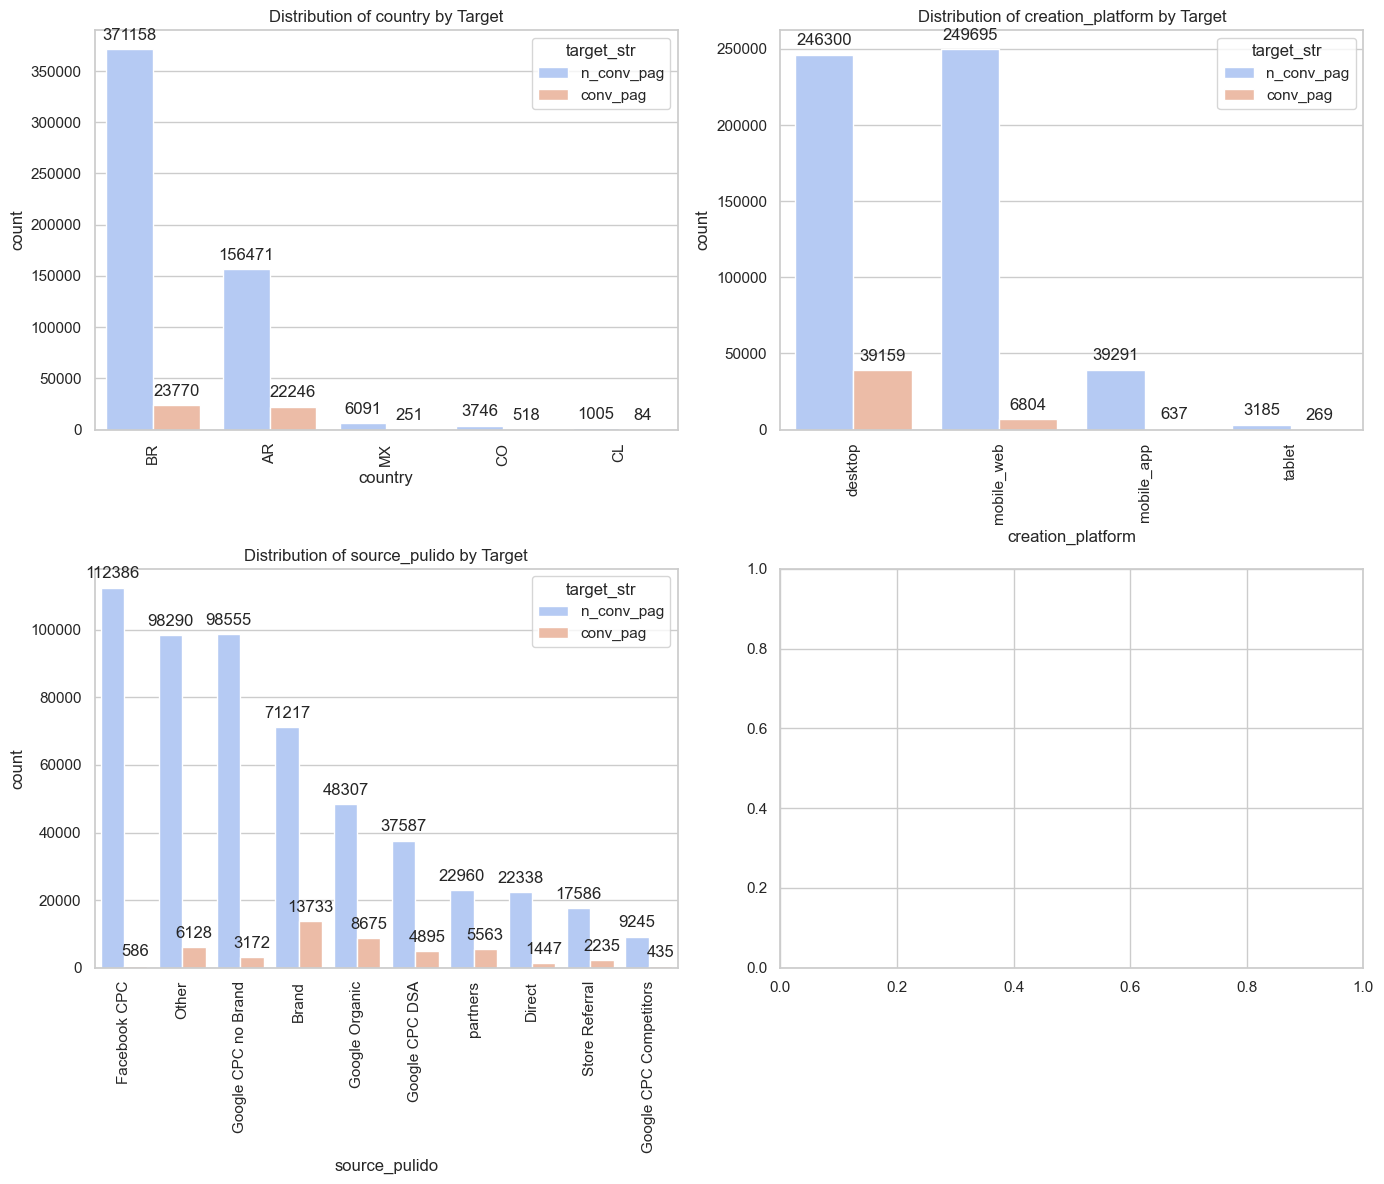

In [15]:
# Configurações iniciais para os plots
sns.set(style="whitegrid")

df['target_str'] = df['target'].replace([0, 1], ['n_conv_pag', 'conv_pag'])

# Filtrando apenas colunas não numéricas, exceto 'Target' e 'target_str'
categorical_columns = df.select_dtypes(exclude=['int64', 'float64']).columns.drop('target_str')

# Definindo o layout do grid de plots
n_plots = len(categorical_columns)

n_cols = 2  # Número de colunas no grid
n_rows = (n_plots + n_cols - 1) // n_cols  # Número de linhas, arredondado para cima

# Criando uma figura para conter os plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6 * n_rows))

for i, column in enumerate(categorical_columns):
    # Determina a posição do plot no grid
    row, col = divmod(i, n_cols)
    ax = axes[row, col]
    
    # Determinar a ordem das categorias do maior para o menor
    order = df[column].value_counts().index
    
    # Cria o gráfico de barras verticais
    sns.countplot(x=column, hue='target_str', data=df, palette='coolwarm', ax=ax, order=order, orient = "h")
    ax.set_title(f'Distribution of {column} by Target')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    # Adicionando valores em cima das barras
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points')

# Ajuste final para melhorar a apresentação e evitar sobreposição de elementos
plt.tight_layout()
plt.show()

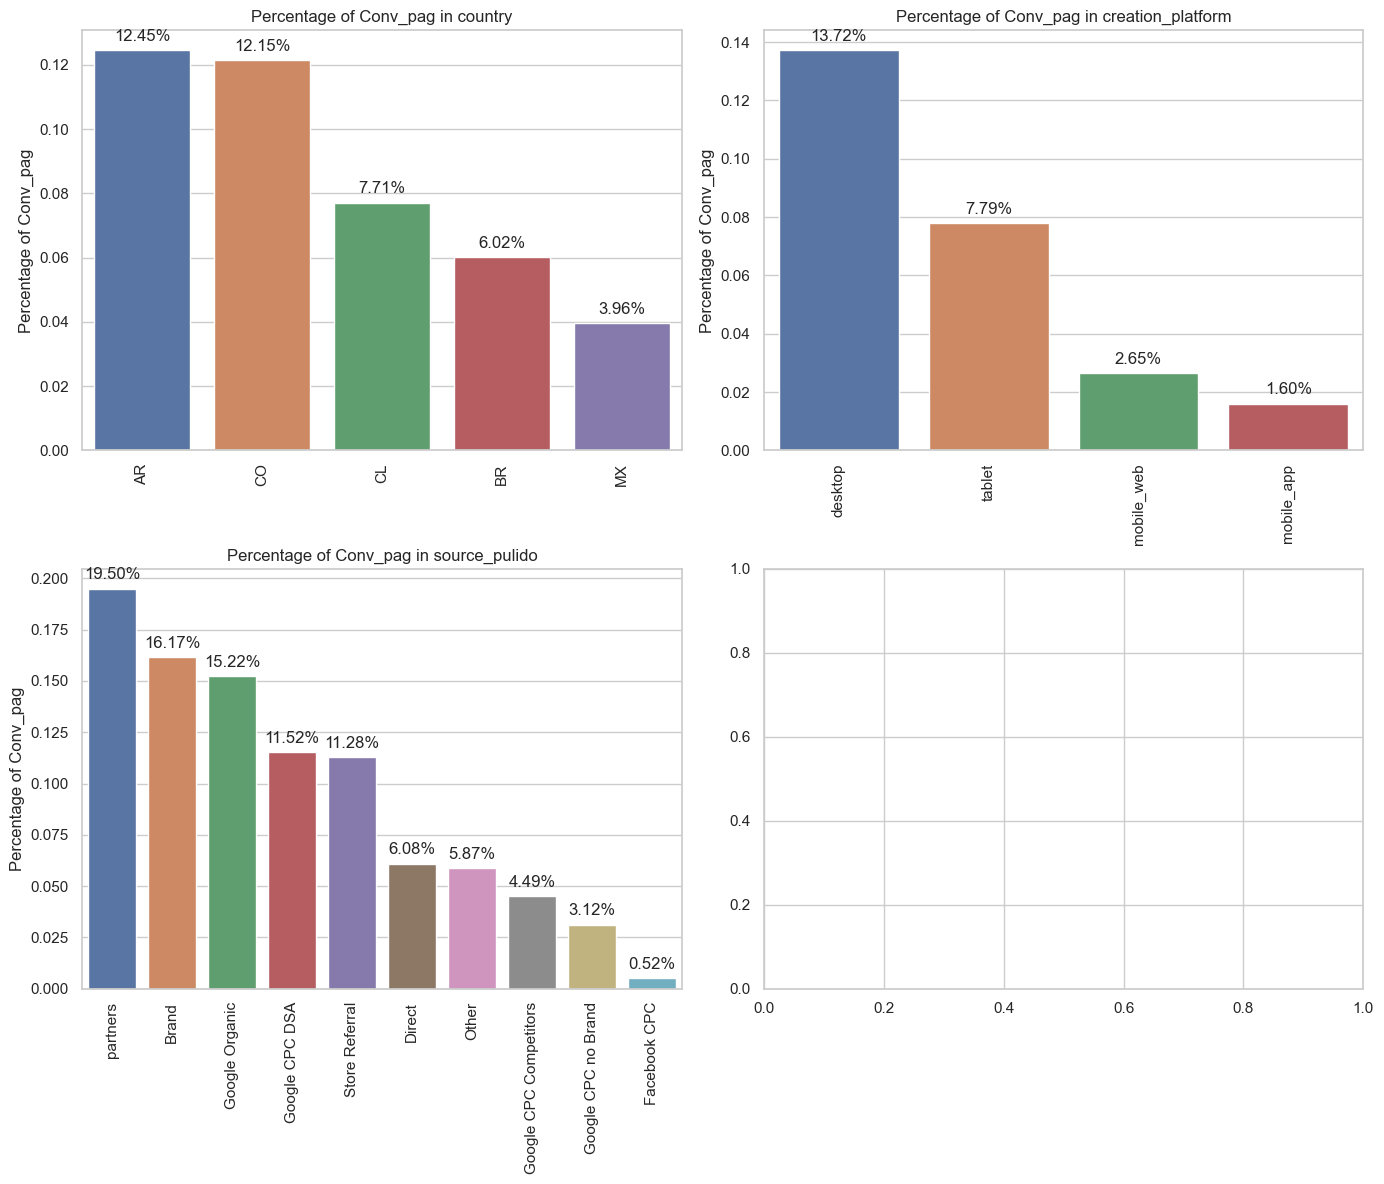

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Configurações iniciais para os plots
sns.set(style="whitegrid")

# Definindo o layout do grid de plots
n_plots = len(categorical_columns)

n_cols = 2  # Número de colunas no grid
n_rows = (n_plots + n_cols - 1) // n_cols  # Número de linhas, arredondado para cima

# Criando uma figura para conter os plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 6 * n_rows))

for i, column in enumerate(categorical_columns):
    # Determina a posição do plot no grid
    row, col = divmod(i, n_cols)
    ax = axes[row, col]
    
    # Agregar dados para calcular a proporção de 'conv_pag' por categoria
    prop_data = df.groupby(column)['target'].mean().reset_index()
    prop_data.sort_values('target', ascending=False, inplace=True)

    # Plotar a proporção de 'conv_pag'
    sns.barplot(x=column, y='target', data=prop_data, ax=ax, order=prop_data[column])
    ax.set_title(f'Percentage of Conv_pag in {column}')
    ax.set_xlabel('')
    ax.set_ylabel('Percentage of Conv_pag')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    # Adicionando os valores das proporções em cima das barras
    for p in ax.patches:
        percentage = f'{100 * p.get_height():.2f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Ajuste final para melhorar a apresentação e evitar sobreposição de elementos
plt.tight_layout()
plt.show()


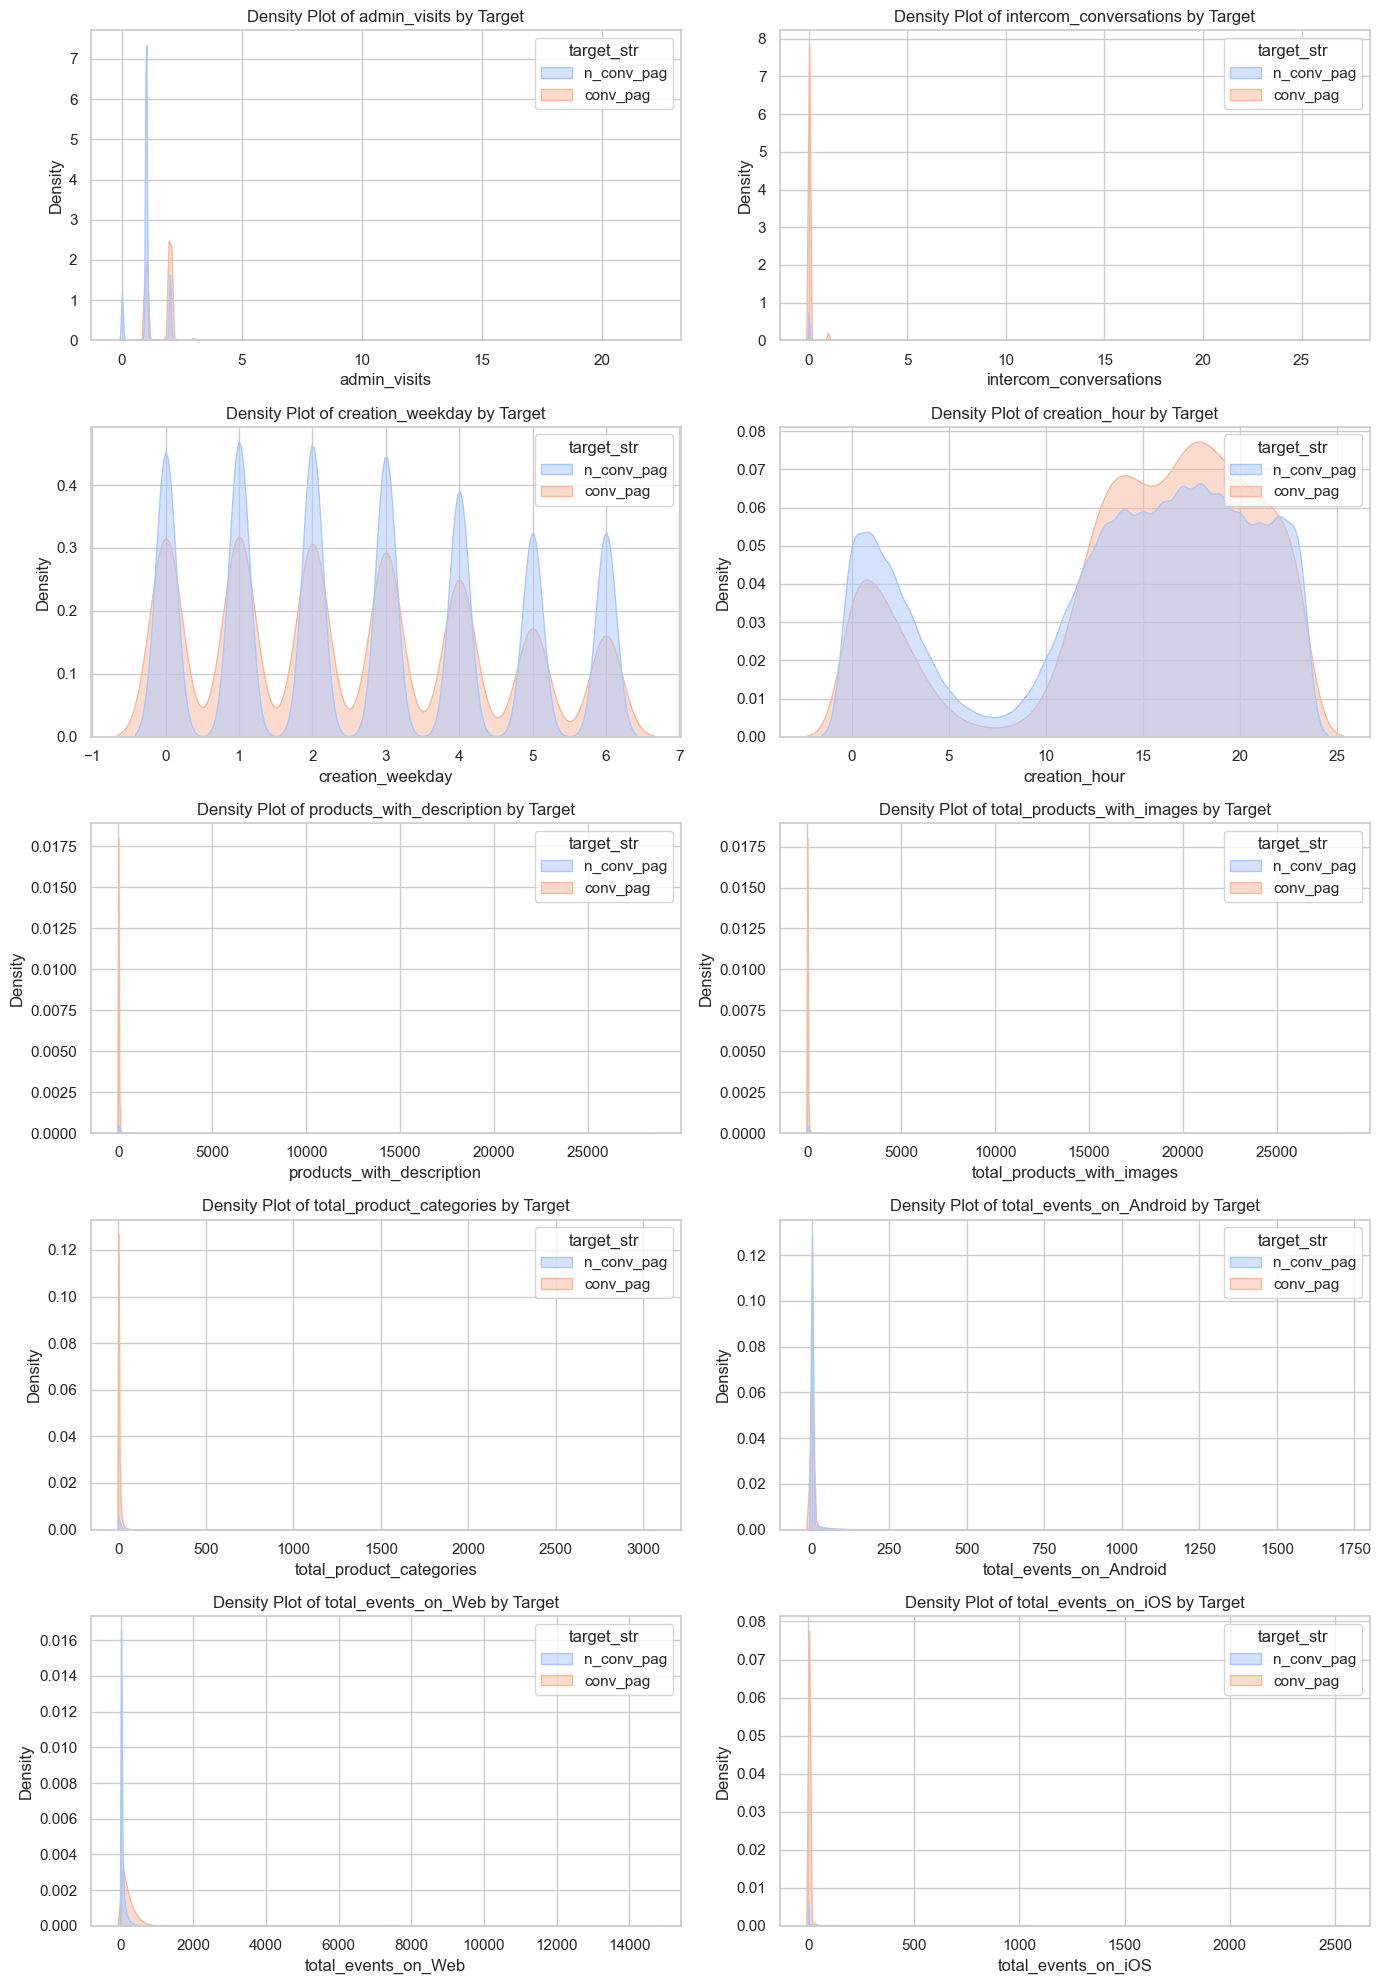

In [6]:

# Configurações iniciais para os plots
sns.set(style="whitegrid")

# Filtrando apenas colunas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.drop('target')  # Excluindo 'Target'

# Definindo o layout do grid de plots
n_plots = len(numeric_columns)

n_cols = 2  # Número de colunas no grid
n_rows = (n_plots + n_cols - 1) // n_cols  # Número de linhas, arredondado para cima

# Criando uma figura para conter os plots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 4 * n_rows))

for i, column in enumerate(numeric_columns):
    # Determina a posição do plot no grid
    row, col = divmod(i, n_cols)
    ax = axes[row, col]
    
    # Cria o gráfico de densidade
    sns.kdeplot(data=df, x=column, hue='target_str', fill=True, common_norm=False, alpha=0.5, palette='coolwarm', ax=ax)
    ax.set_title(f'Density Plot of {column} by Target')
    ax.set_ylabel('Density')

# Esconde os subplots vazios se o número de plots não preencher completamente o grid
for j in range(i + 1, n_rows * n_cols):
    axes.flatten()[j].set_visible(False)

# Ajuste final para melhorar a apresentação e evitar sobreposição de elementos
plt.tight_layout()
plt.show()